# Data analysis with lean Six sigma 

## 1. Data Manipulation in python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('train_hp.csv')

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check for null values 

dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# selection of null value columns

null_var=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]

In [6]:
null_var

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

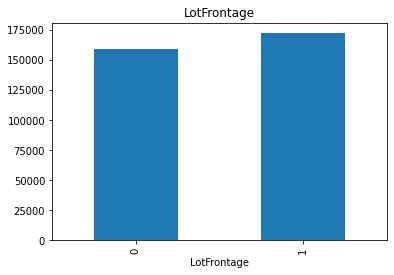

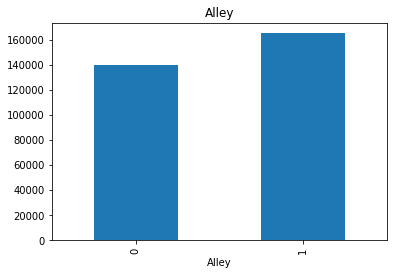

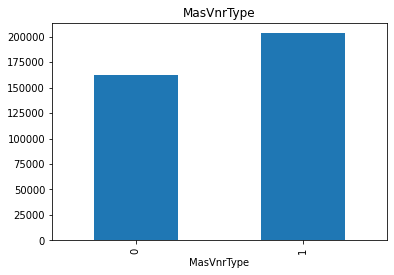

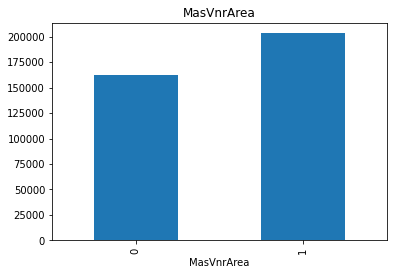

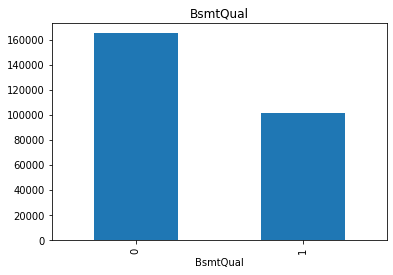

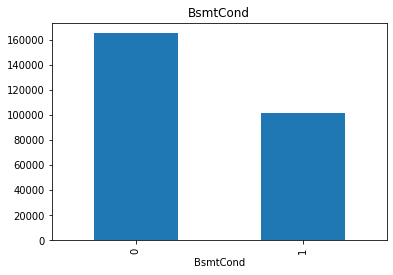

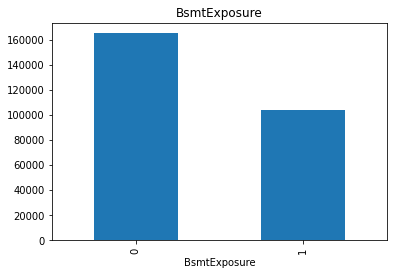

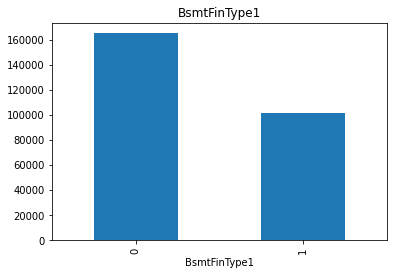

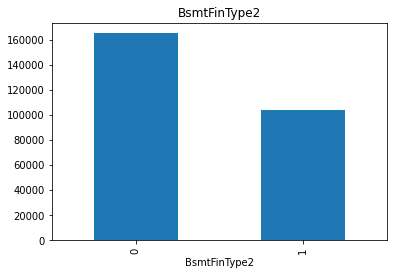

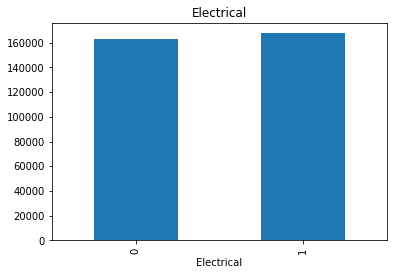

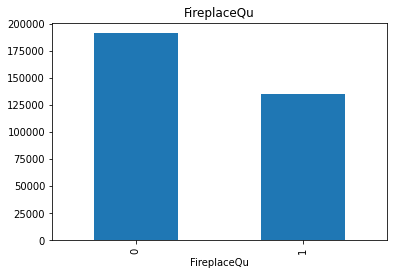

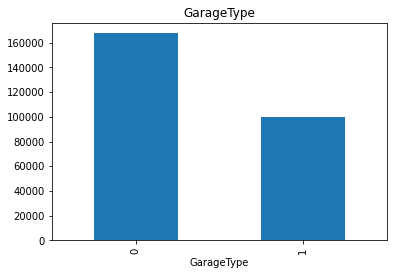

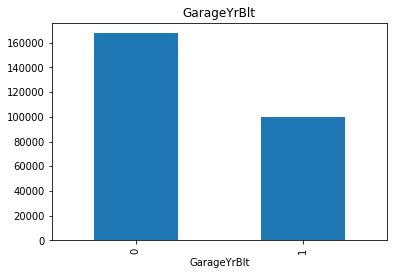

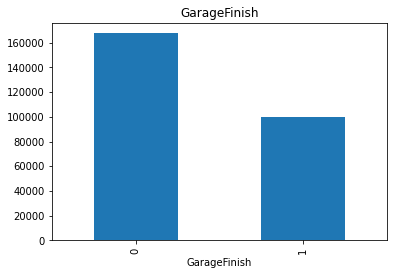

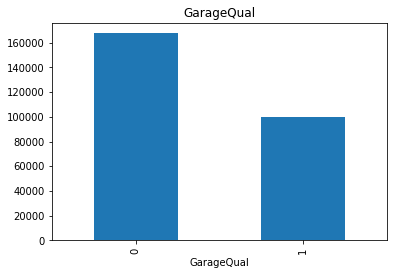

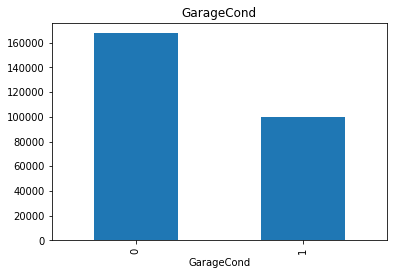

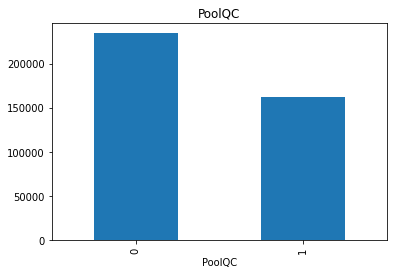

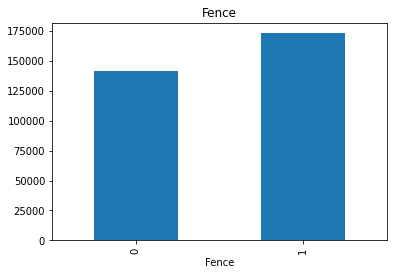

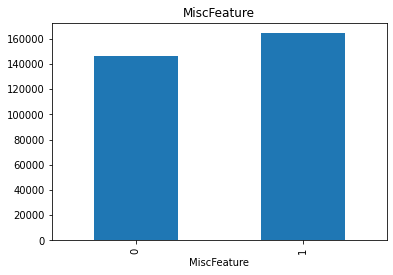

In [7]:
# relationship between null feature and output variable 
for feature in null_var:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [8]:
# getting numarical and catogorical varibales 

numarical_null_var=[i for i in null_var if dataset[i].dtypes!='O']
catogorical_null_var=[feature for feature in null_var if feature not in numarical_null_var]

# in numarical varibale check for continues and discrit 

continues_numarical_null_var=[feature for feature in numarical_null_var if len(dataset[feature].unique())>25]

In [9]:
# get filled with numarical null varibles 

for feature in numarical_null_var:
    median=dataset[feature].median()
    dataset[feature]=dataset[feature].fillna(median)

In [10]:
# get filled with catogorical null varibles 

for feature in catogorical_null_var:
    dataset[feature]=dataset[feature].fillna('unknown')

In [11]:
[i for i in dataset.columns if dataset[i].isnull().sum()>0]

[]

# 2. Descriptive Statistics

In [14]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
# get numarical features 
num_feature=[feature for feature in dataset.describe().columns]

# year features 
year_feature=[feature for feature in num_feature if 'Yr'in feature or 'Year' in feature]

# numarical continous feature 
cont_num_feature=[feature for feature in num_feature if len(dataset[feature].unique())>25 and feature not in year_feature+['Id']]

# numarical discrite feature 
disc_num_feature=[feature for feature in num_feature if feature not in cont_num_feature+year_feature+['Id']]

# get catagorical features 
cat_feature=[feature for feature in dataset.columns if feature not in num_feature]

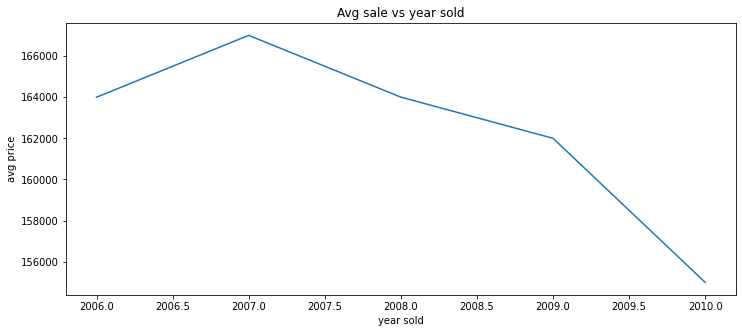

In [35]:
# realtionship between yearsold and sales price 

plt.figure(figsize=(12,5))

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('year sold')
plt.ylabel('avg price')
plt.title('Avg sale vs year sold')
plt.show()

## scatter plot

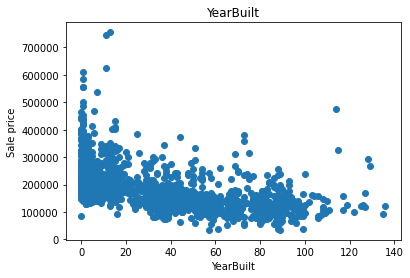

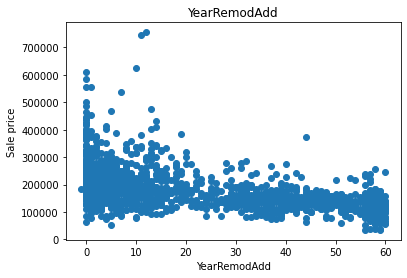

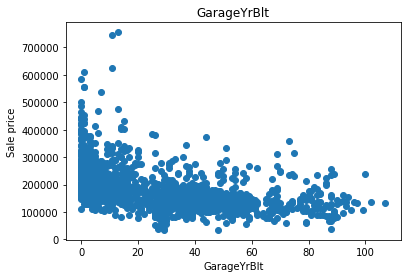

In [37]:
# sale year and price graph not related so calculate the age of building and renovation age ect

for i in year_feature:
    if i!='YrSold':
        data=dataset.copy()
        data[i]=data['YrSold']-data[i]
        plt.scatter(data[i],data['SalePrice'])
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel('Sale price')
        plt.show()

## bar charts analysis

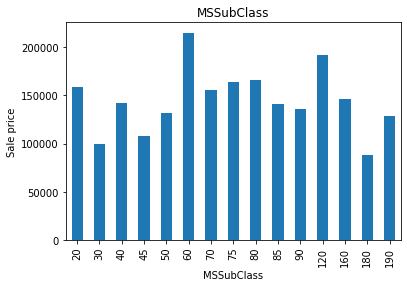

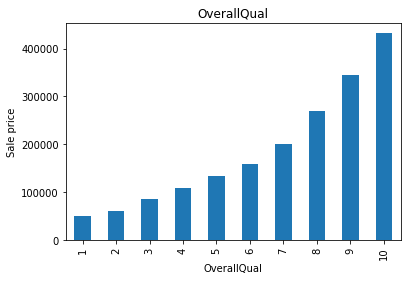

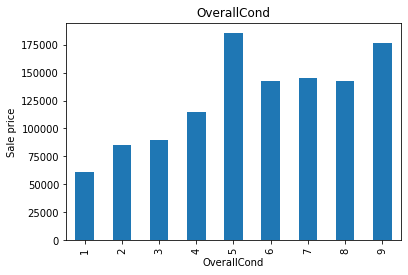

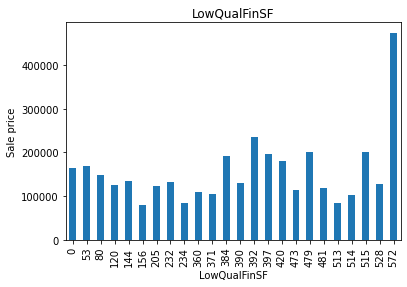

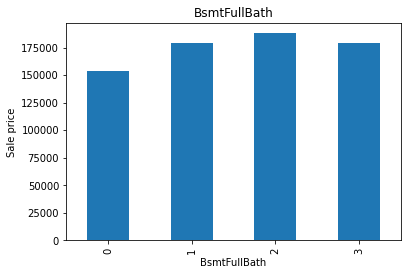

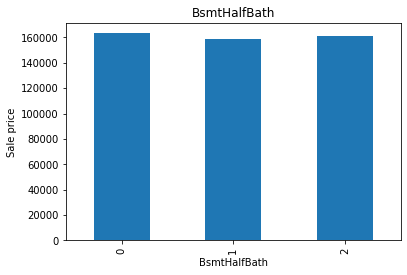

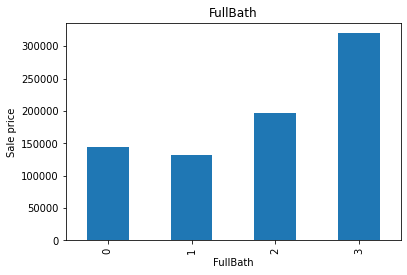

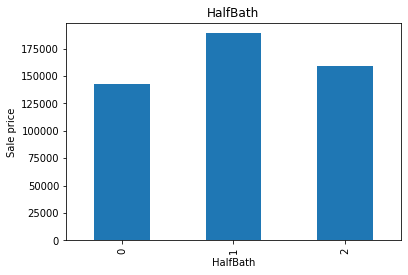

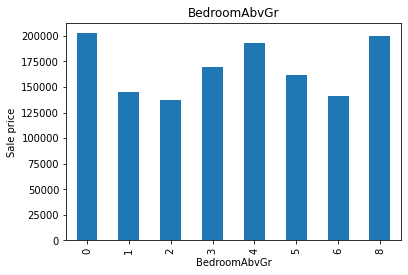

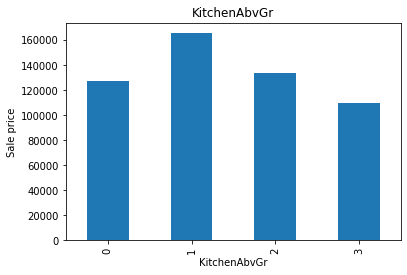

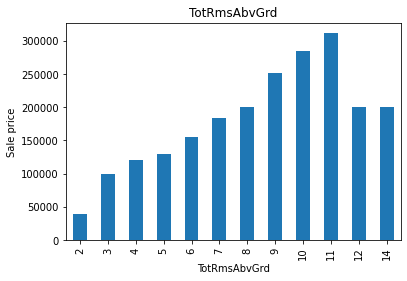

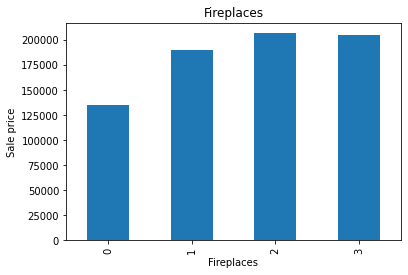

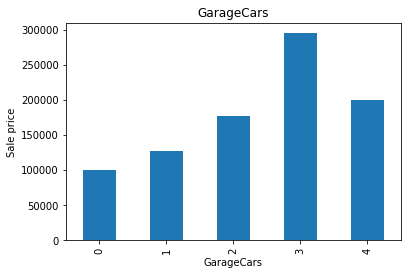

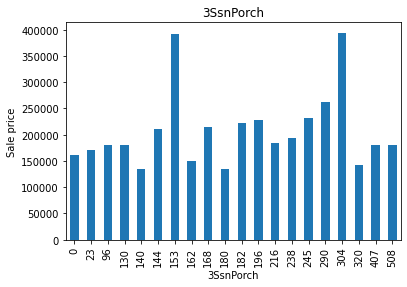

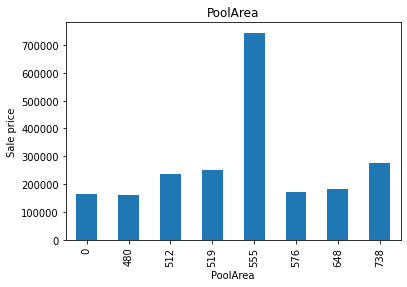

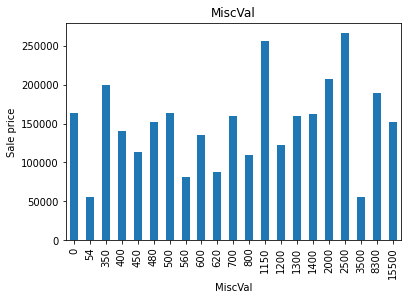

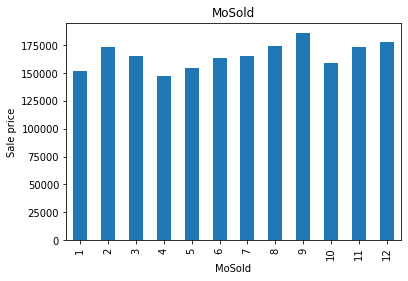

In [38]:
# plot bar plot for disctite numaricale variable

for i in disc_num_feature:
    data=dataset.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Sale price')
    plt.show()

## histogram analysis

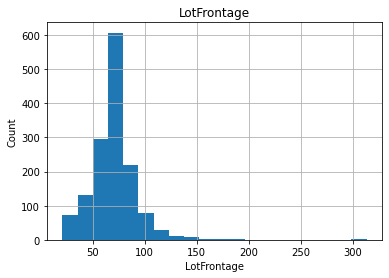

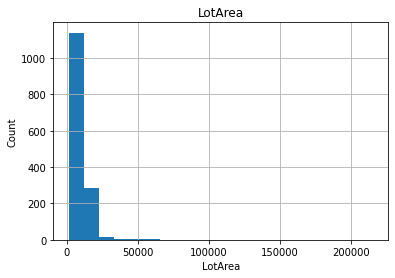

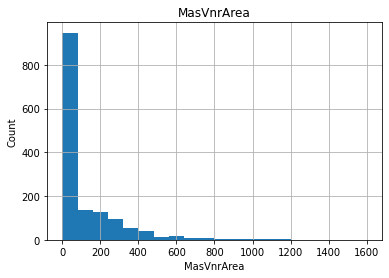

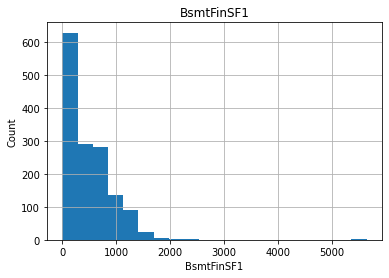

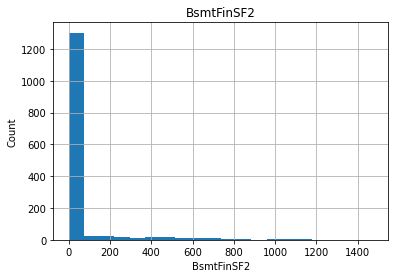

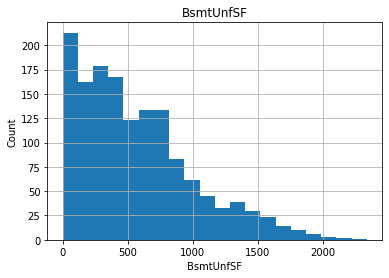

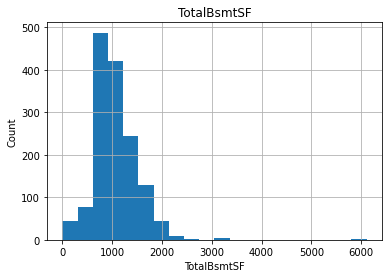

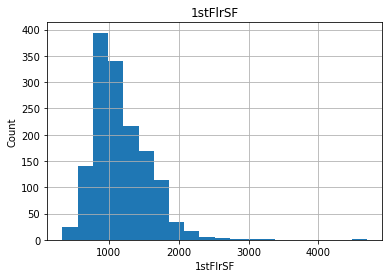

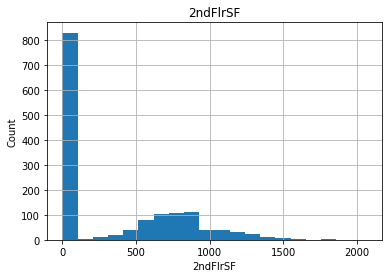

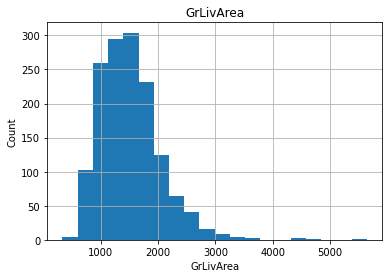

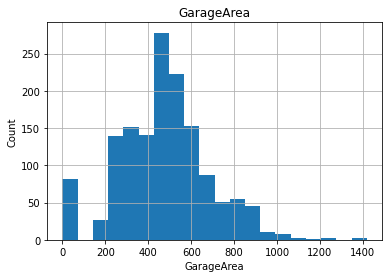

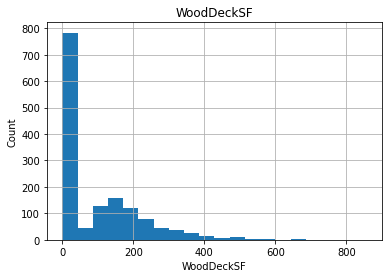

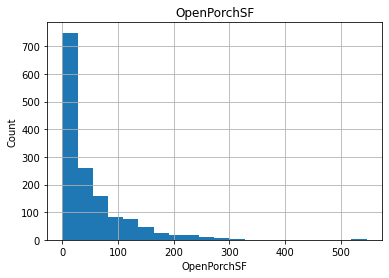

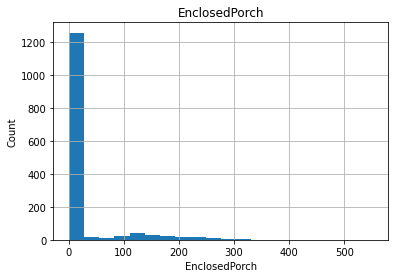

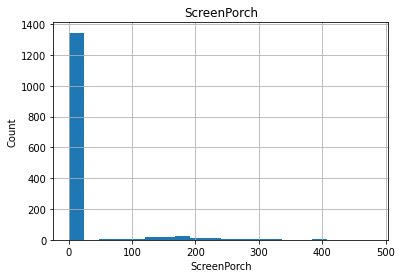

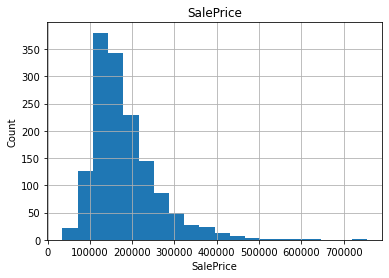

In [39]:
# plot histogram for continues numaricle variable

for i in cont_num_feature:
    data=dataset.copy()
    data[i].hist(bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

## log transformation and probability plot

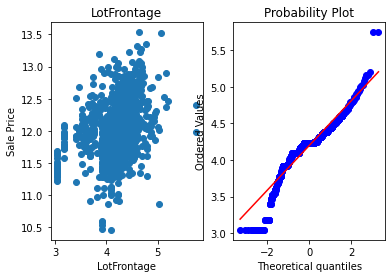

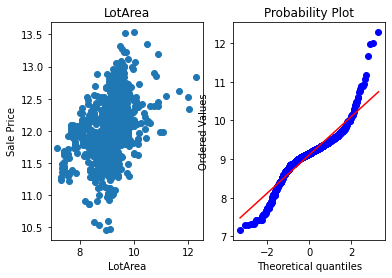

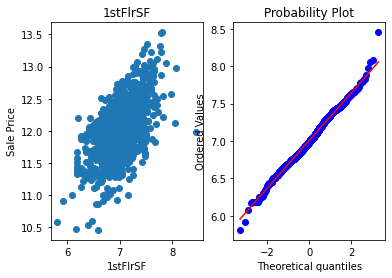

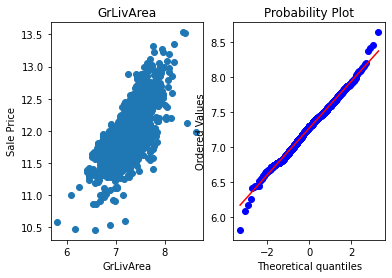

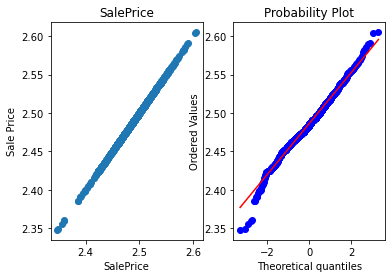

In [42]:
# will apply log transformation to chk the distribution and using probability plot 

from scipy.stats import probplot
for i in cont_num_feature:
    data=dataset.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.subplot(1,2,1)
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('Sale Price')
        plt.title(i)
        plt.subplot(1,2,2)
        probplot(data[i],plot=plt)
        plt.show()

## box plot to chk outlier 

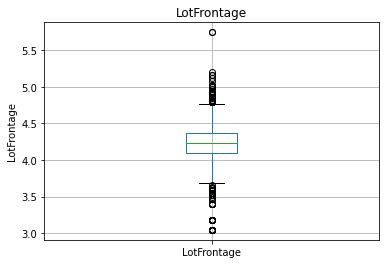

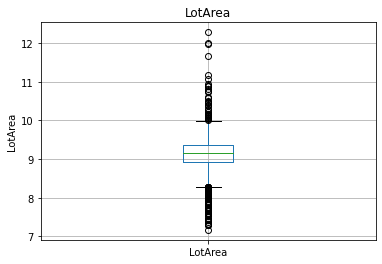

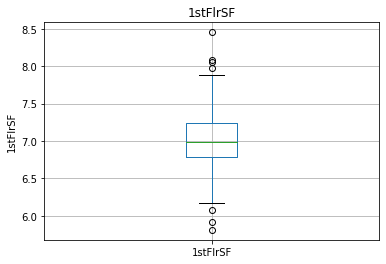

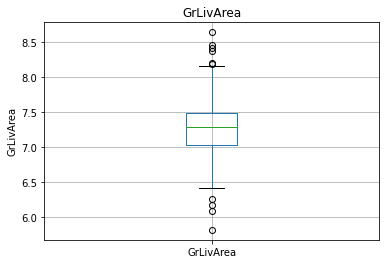

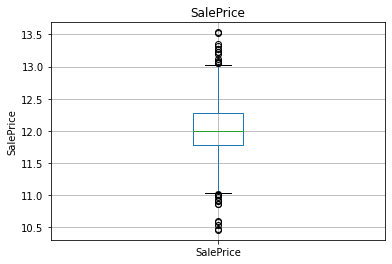

In [43]:
# finding outlier in contineus numaricale variable

for i in cont_num_feature:
    data=dataset.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

## correlation and heatmap to chk interrelationship

<AxesSubplot:>

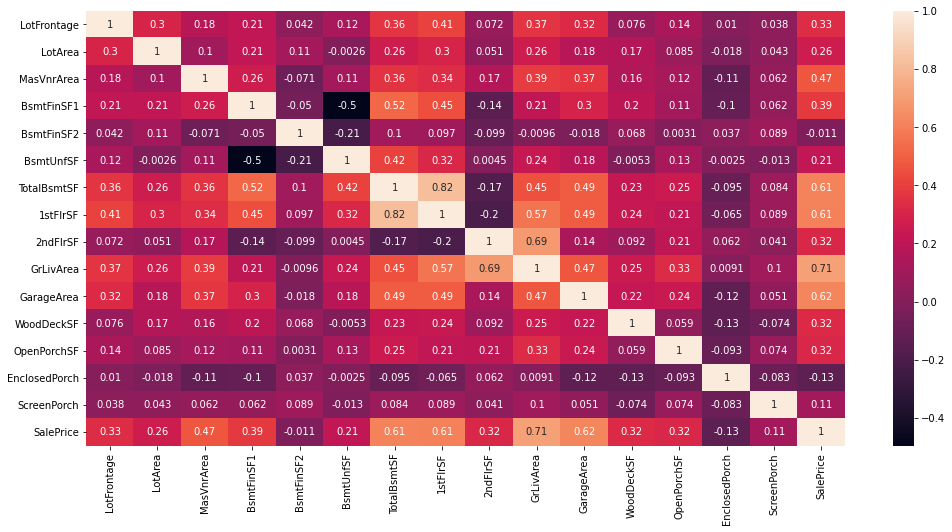

In [54]:
# correlation between the saleprice and other contineus numaricale variable

plt.figure(figsize=(17,8))
sns.heatmap(dataset[cont_num_feature].corr(),annot=True)

In [44]:
dataset[cat_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,unknown,unknown,unknown,WD,Normal
1,RL,Pave,unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,unknown,unknown,unknown,WD,Normal
2,RL,Pave,unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,unknown,unknown,unknown,WD,Normal
3,RL,Pave,unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,unknown,unknown,unknown,WD,Abnorml
4,RL,Pave,unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,unknown,unknown,unknown,WD,Normal


# Hypothesis Testing

## Anova

In [10]:
import scipy.stats as sts

In [12]:
data=pd.read_excel('htd.xlsx')

In [14]:
data.head(5)

,Arca 1,Arca 2,Arca 3
0,4,4,3
1,4,4,3
2,5,4,3
3,4,3,1
4,3,2,1


In [30]:
# convert data to array

arca1=np.array(data.iloc[:,0])
arca2=np.array(data.iloc[:,1])
arca3=np.array(data.iloc[:,2])

In [35]:
# one way anova 

stats,p=sts.f_oneway(arca1,arca2,arca3)

if p>0.05:
    print('there is no significant diference')
else:
    print('there is significant difference in data')

there is significant difference in data


## Kruskal-Wallis H-test for independent samples

In [59]:
#its an alternative to anova without any assumtion 

stats,p=sts.kruskal(arca1,arca2,arca3)
if p>0.05:
    print('there is no significant diference')
else:
    print('there is significant difference in data')

there is significant difference in data


## student t-test

In [39]:
# t - test for two sample mean

tcal,p_value=sts.ttest_ind(data['Arca 1'],data['Arca 2'])

if p_value>0.05:
    print('there is no significant diference same average')
else:
    print('there is significant difference in data with different average')

there is significant difference in data with different average


In [41]:
# t-test for single sample mean 

tcal,p_value=sts.ttest_1samp(data['Arca 1'],4.1)
if p_value>0.05:
    print('population mean = 4.1')
else:
    print('population mean not equale to 4.1')

population mean not equale to 4.1


In [42]:
# paired t test to check performance effectiveness 

tcal,p_value=sts.ttest_rel(data['Arca 1'],data['Arca 2'])

if p_value>0.05:
    print('there is no significant impact on crop by changes done')
else:
    print('there is significant impact on crop by changes')

there is significant impact on crop by changes


## chi square test

In [53]:
# check to catogorical variables are indipendet to each other
obs=np.array([[7,8,13,7,6],
    [7,13,16,10,2],
    [5,4,5,2,1],
    [17,31,27,20,17],
    [1,2,5,4,1],
    [4,4,7,14,3],
    [21,41,36,32,18],
    [1,2,1,2,0]])


In [48]:
obs.shape

(8, 5)

In [58]:
#chi square test 

chi2,p,dof,exp=sts.chi2_contingency(obs)

print(chi2,'dof',dof)
if p<sts.chi2.ppf(0.95,dof):
    print('they are independent to each other')
else:
    print('they are dependent to each other')

25.446644398973042 dof 28
they are independent to each other


## z-test

In [69]:
# two sample z-test

import statsmodels.stats.weightstats as zstat
z,p=zstat.ztest(arca1,arca2)
if p>0.05:
    print('there is no significant diference same average')
else:
    print('there is significant difference in data with different average')

there is significant difference in data with different average


## Confidence Interval calculation

In [70]:
# confidence interval for given cofidence level 90%

sts.bayes_mvs(arca1)

(Mean(statistic=4.53, minmax=(4.404111196175521, 4.65588880382448)),
 Variance(statistic=0.5867010309278352, minmax=(0.4618372710455162, 0.7386464562729994)),
 Std_dev(statistic=0.763992560915811, minmax=(0.6795861027460143, 0.8594454353087225)))

## statistical Process Control (SPC)

##### Control charts, also known as Shewhart charts (after Walter A. Shewhart) or process-behavior charts, in statistical process control are tools used to determine if a manufacturing or business process is in a state of statistical control. The requirements and steps in a control chart are:
1. Datas from samples
2. Average of the samples ofeach lot
3. Finding range of the sample means
4. Calculate average value of the sample mean(it would be the center line)
5. Define upper and lower control limit for range and sample means.

### Problem: A soft drink is sold in bottles marked 25ml.An automatic machine fills the bottles.Samples of 5 bottles taken every 15 minutes of production during first shift produced,the result is shown in the first chart below(Only sample number and sample mean( x¯ ) is given).Now calculate the samples that are out of range and show final chart with standard deviation.

In [98]:
# connect data from google sheet use export format=csv

url='https://docs.google.com/spreadsheets/d/1LSHC1VWppDRMtvoPz_DmbXOi_j8RUJ_Mt5aVjwkA79M/export?format=csv'

data=pd.read_csv(url)

In [99]:
data.head()

,sample,x bar,range
0,1,29.0,11
1,2,25.0,8
2,3,26.0,5
3,4,25.2,5
4,5,25.4,3


### 1. R chart

In [100]:
# calculate avaerage range and control limits given sample size 5 D3=0, D4=2.114


rbar=data['range'].mean()
r_upper=2.114*rbar
r_lower=0*rbar

In [101]:
# insert columns to plot 
data.insert(3,'r bar',rbar)
data.insert(4,'r upper',r_upper)
data.insert(5,'r lower',r_lower)

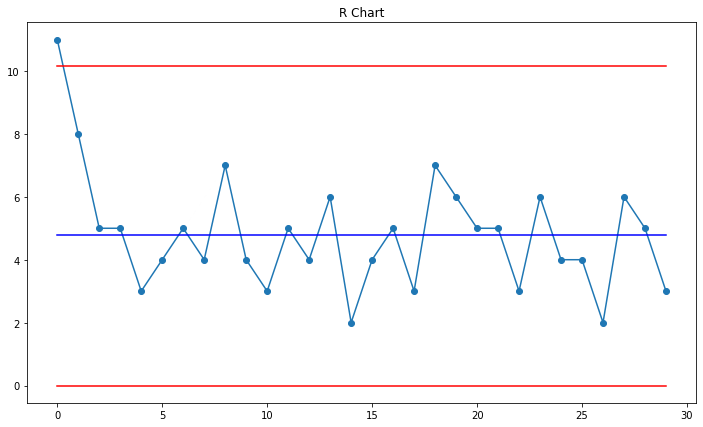

In [102]:
# plot R chart 

plt.figure(figsize=(12,7))
plt.plot(data['range'],marker='o')
plt.plot(data['r bar'],color='b')
plt.plot(data['r upper'],color='r')
plt.plot(data['r lower'],color='r')
plt.title('R Chart')
plt.show()

In [103]:
# control comments 

def rchart(r):
    if r<r_lower:
        print('process going out of control and its bellow lower bound',r_lower)
    elif r>r_upper:
        print('process going out of control and its above upper bound',r_upper)
    else:
        print('process in control')

### 2. X bar R chart

In [104]:
# calculate average of x bar and constants for sample size of 5 is A2=0.577

xbarbar=np.round(data['x bar'].mean(),2)
x_upper=np.round(xbarbar+0.577*rbar,2)
x_lower=np.round(xbarbar-0.577*rbar,2)

In [105]:
data.insert(6,'x barbar',xbarbar)
data.insert(7,'x upper',x_upper)
data.insert(8,'x lower',x_lower)


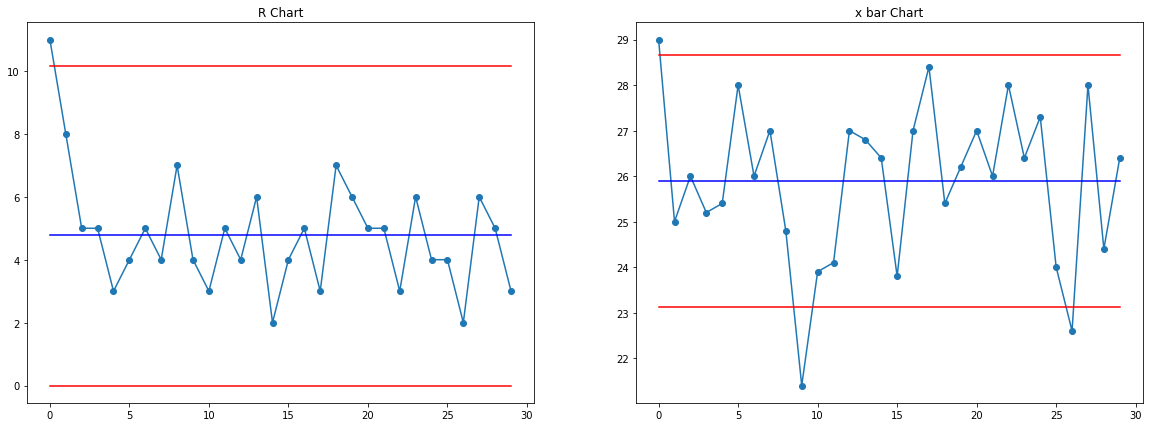

In [106]:
# plot both x bar and R chart 

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(data['range'],marker='o')
plt.plot(data['r bar'],color='b')
plt.plot(data['r upper'],color='r')
plt.plot(data['r lower'],color='r')
plt.title('R Chart')
plt.subplot(1,2,2)
plt.plot(data['x bar'],marker='o')
plt.plot(data['x barbar'],color='b')
plt.plot(data['x upper'],color='r')
plt.plot(data['x lower'],color='r')
plt.title('x bar Chart')
plt.show()

In [107]:
# control comments 

def xbarrchart(xbar,r):
    if r<r_lower:
        print('process going out of control in range and its bellow lower bound',r_lower)
    elif r>r_upper:
        print('process going out of control in range and its above upper bound',r_upper)
    elif xbar<x_lower:
        print('process going out of control in average and its above upper bound',x_lower)
    elif xbar>x_upper:
        print('process going out of control in average and its above upper bound',x_upper)
    else:
        print('process in control')

## 3. X bar S chart 

In [108]:
# calculate upper and lower limit with variable constants A3= 1.427 and B3=0, B4=2.089

data['std div']=(abs(data['x bar']-data['x barbar']))/np.sqrt(data['x bar'].count())

sd=np.round(data['std div'].mean(),2)

xs_upper=np.round(xbarbar+1.427*sd,2)
xs_lower=np.round(xbarbar-1.427*sd,2)

s_upper=np.round(2.089*sd,2)
s_lower=0*sd



In [109]:
data.insert(10,'sd bar',sd)
data.insert(11,'x-s upper',xs_upper)
data.insert(12,'x-s lower',xs_lower)
data.insert(13,'s upper',s_upper)
data.insert(14,'s lower',s_lower)

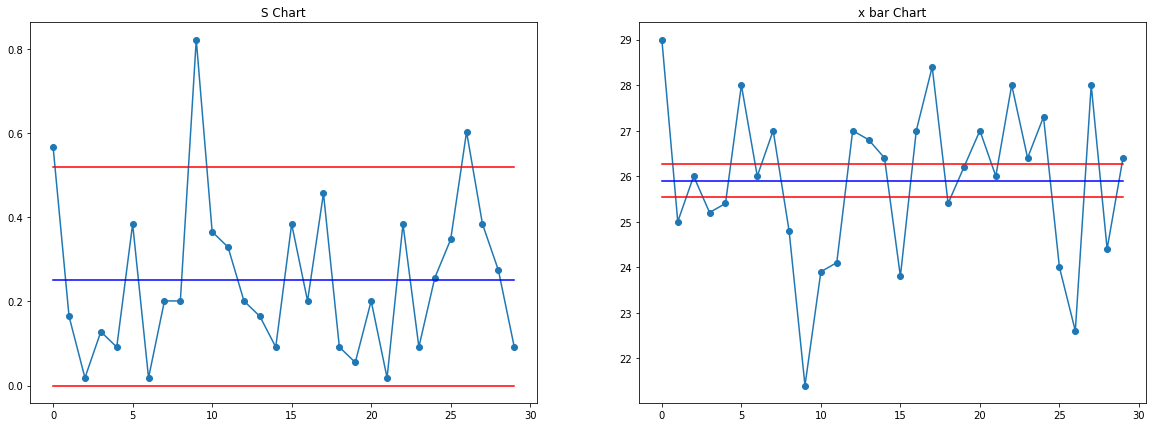

In [111]:
# plot both x bar and R chart 

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(data['std div'],marker='o')
plt.plot(data['sd bar'],color='b')
plt.plot(data['s upper'],color='r')
plt.plot(data['s lower'],color='r')
plt.title('S Chart')
plt.subplot(1,2,2)
plt.plot(data['x bar'],marker='o')
plt.plot(data['x barbar'],color='b')
plt.plot(data['x-s upper'],color='r')
plt.plot(data['x-s lower'],color='r')
plt.title('x bar Chart')
plt.show()

In [112]:
# control comments 

def xbarschart(xbar,s):
    if s<s_lower:
        print('process going out of control in std div and its bellow lower bound',s_lower)
    elif s>s_upper:
        print('process going out of control in std div and its above upper bound',s_upper)
    elif xbar<xs_lower:
        print('process going out of control in average and its above upper bound',xs_lower)
    elif xbar>xs_upper:
        print('process going out of control in average and its above upper bound',xs_upper)
    else:
        print('process in control')

## Atribute charts (p,np,u,c)

In [158]:
dataurl='https://docs.google.com/spreadsheets/d/12Bbs1uLBWeR-KjSDdWdxQF6L8HlrCQmvYSajGhQiaV8/export?format=csv'

In [159]:
df=pd.read_csv(dataurl)

In [160]:
df.head()

,Day Number,Invoices Inspected (n),Number Defective (np),Fraction Defective (p)
0,1,100,22,0.22
1,2,100,33,0.33
2,3,100,24,0.24
3,4,100,20,0.20
4,5,100,18,0.18


## 4. p control charts

In [161]:
# calculate sample size n, no. of sample k, npbar,pbar

k=df['Day Number'].count()
n=df['Invoices Inspected (n)'].mean()
pbar=df['Fraction Defective (p)'].mean()
print('k={}, n={},p bar={}'.format(k,n,pbar))

k=25, n=100.0,p bar=0.2484


In [162]:
# calculate upper and lower limit 

p_upper=pbar+3*np.sqrt((pbar*(1-pbar))/n)
p_lower=pbar-3*np.sqrt((pbar*(1-pbar))/n)

In [163]:
df.insert(4,'p bar',pbar)
df.insert(5,'p upper',p_upper)
df.insert(6,'p lower',p_lower)

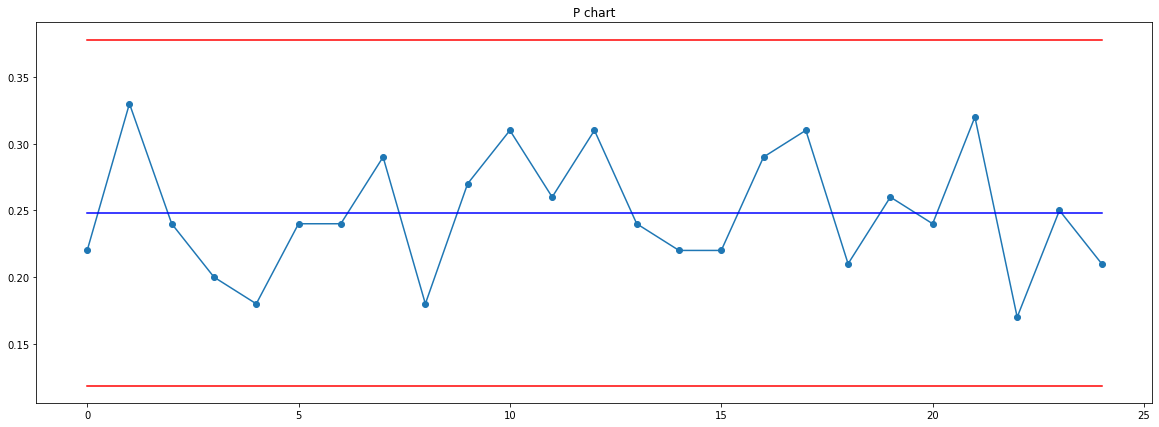

In [164]:
# plot p chart 

plt.figure(figsize=(20,7))
plt.plot(df['Fraction Defective (p)'],marker='o')
plt.plot(df['p bar'],color='b')
plt.plot(df['p upper'],color='r')
plt.plot(df['p lower'],color='r')
plt.title('P chart')
plt.show()

In [165]:
# control comments 

def pchart(p):
    if p<p_lower:
        print('process going out of control  and its bellow lower bound',p_lower)
    elif p>p_upper:
        print('process going out of control and its above upper bound',p_upper)

    else:
        print('process in control')

## 5. np chart

In [167]:
# calculate np bar 

npbar=df['Number Defective (np)'].mean()
print('np bar ',npbar)


np bar  24.84


In [175]:
# calculate upper and lower limit 

np_upper=npbar+3*np.sqrt(npbar*(1-pbar))
np_lower=np.max([0,npbar-3*np.sqrt(npbar*(1-pbar))])

In [176]:
df.insert(7,'np bar',npbar)
df.insert(8,'np upper',np_upper)
df.insert(9,'np lower',np_lower)

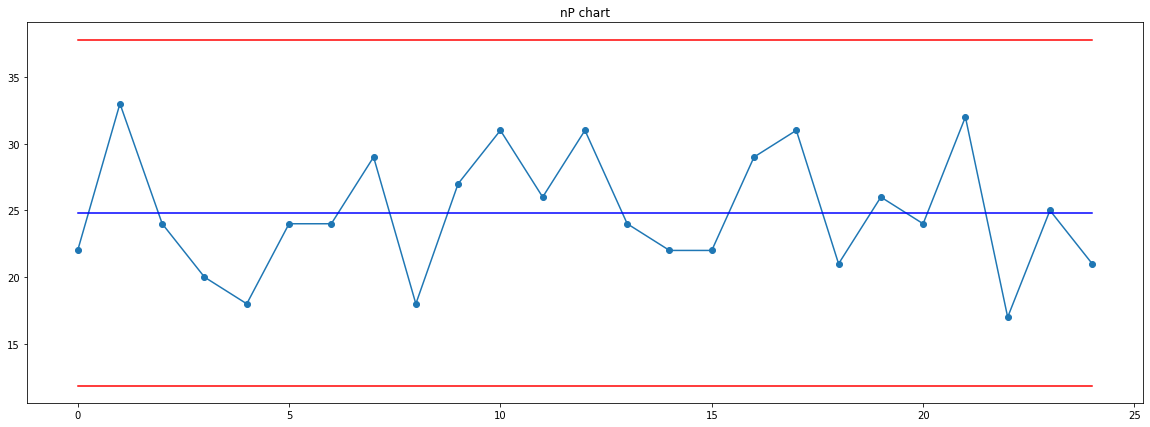

In [178]:
# plot np chart 

plt.figure(figsize=(20,7))
plt.plot(df['Number Defective (np)'],marker='o')
plt.plot(df['np bar'],color='b')
plt.plot(df['np upper'],color='r')
plt.plot(df['np lower'],color='r')
plt.title('nP chart')
plt.show()

In [179]:
# control comments 

def npchart(np):
    if np<np_lower:
        print('process going out of control  and its bellow lower bound',np_lower)
    elif np>np_upper:
        print('process going out of control and its above upper bound',np_upper)

    else:
        print('process in control')

## 6. C chart

In [180]:
# in c chart npbar is nothing but c bar

c_upper=npbar+3*np.sqrt(npbar)
c_lower=npbar-3*np.sqrt(npbar)

print(c_lower,c_upper)

9.888077046747465 39.79192295325254


In [181]:
df.insert(10,'c upper',c_upper)
df.insert(11,'c lower',c_lower)

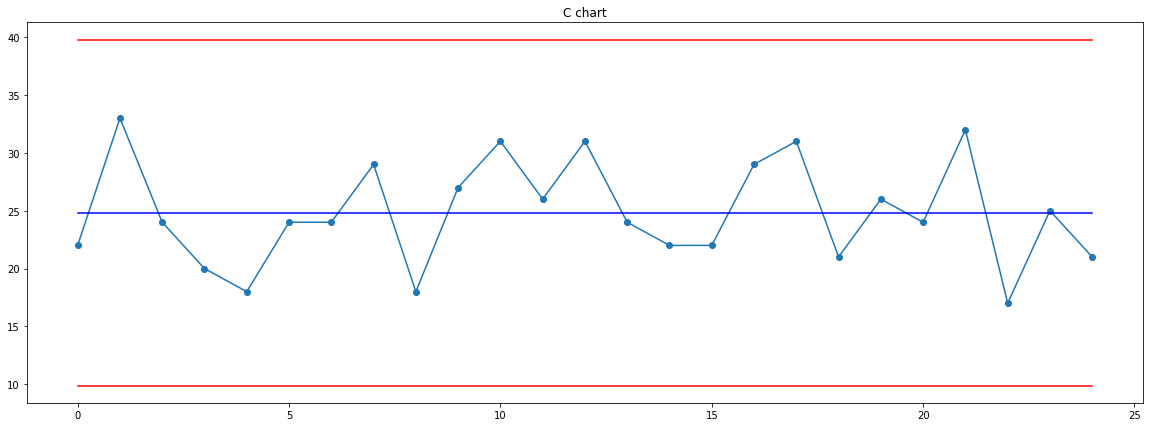

In [182]:
# plot np chart 

plt.figure(figsize=(20,7))
plt.plot(df['Number Defective (np)'],marker='o')
plt.plot(df['np bar'],color='b')
plt.plot(df['c upper'],color='r')
plt.plot(df['c lower'],color='r')
plt.title('C chart')
plt.show()

In [183]:
# control comments 

def cchart(c):
    if c<c_lower:
        print('process going out of control  and its bellow lower bound',c_lower)
    elif c>c_upper:
        print('process going out of control and its above upper bound',c_upper)

    else:
        print('process in control')

## 7. U chart

In [184]:
# as sample size is equale and its 100 so thier wont be any change in c chart and u chart 

## Probability Distribution 

### 1.Uniform Distribution

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


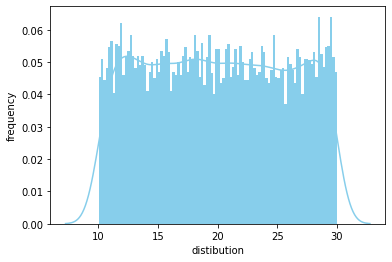

0.0 1.0 25.6


In [14]:
# interval with equal size will have same probality of occurance 
# here one function created to plot and uniform distribution imported from scipy.stats

from scipy.stats import uniform

uniform_distribution=uniform.rvs(loc=10,size=10000,scale=20)

def distchart(distibution):
    sns.distplot(distibution,bins=100,kde=True,color='skyblue',hist_kws={'linewidth':15,'alpha':1})
    plt.xlabel('distibution')
    plt.ylabel('frequency')
    plt.show()

# plot distribution 

distchart(uniform_distribution)

# calculate probability for given value 

uni_pdf=uniform.pdf(loc=10,x=78,scale=20)
uni_cdf=uniform.cdf(loc=10,x=78,scale=20)
uni_ppf=uniform.ppf(q=0.78,loc=10,scale=20)

print(uni_pdf,uni_cdf,uni_ppf)

### 2. Normal Distribution

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


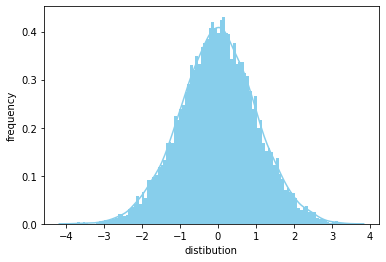

probability of getting 78 is 0.0015051604496354877 
probability of getting less than or equale to 78 is 0.05889674196019566
value bellow 0.78 probablity is 260.23107070671745


In [31]:
# used for contineus numarical data 

from scipy.stats import norm

normal_distribution = norm.rvs(loc=0,size=10000,scale=1)

# plot distribution 

distchart(normal_distribution)

# calculate probability for given value 

nor_pdf=norm.pdf(loc=200,x=78,scale=78) 
nor_cdf=norm.cdf(loc=200,x=78,scale=78)
nor_ppf=norm.ppf(q=0.78,loc=200,scale=78)

print('probability of getting 78 is {} \nprobability of getting less than or equale to 78 is {}\nvalue bellow 0.78 probablity is {}'.format(nor_pdf,nor_cdf,nor_ppf))

### 3. Exponential Distribution
#### The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It has a parameter λ called rate parameter

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


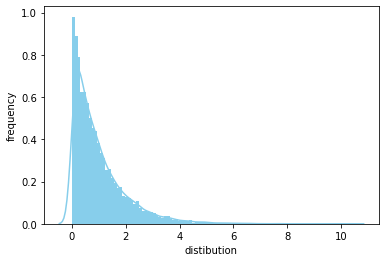

probability of getting 78 is 0.0060949265299083235 
probability of getting less than or equale to 78 is 0.5245957306671507
value bellow 0.78 probablity is 138.1019631451225


In [35]:
# used for contineus time data 

from scipy.stats import expon

expon_distribution = expon.rvs(loc=0,size=10000,scale=1)

# plot distribution 

distchart(expon_distribution)

# calculate probability for given value 

exp_pdf=expon.pdf(loc=20,x=78,scale=78) 
exp_cdf=expon.cdf(loc=20,x=78,scale=78)
exp_ppf=expon.ppf(q=0.78,loc=20,scale=78)

print('probability of getting 78 is {} \nprobability of getting less than or equale to 78 is {}\nvalue bellow 0.78 probablity is {}'.format(exp_pdf,exp_cdf,exp_ppf))

### 4. Poisson Distribution

#### event repeat n times at a fixed interval of time 


c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


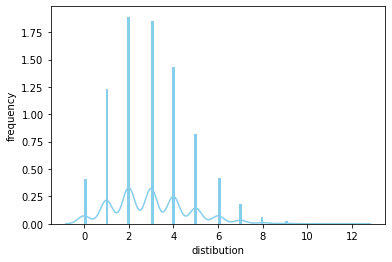

probability of getting 78 is 7.220441907693265e-80 
probability of getting less than or equale to 78 is 1.0
value bellow 0.78 probablity is 4.0


In [44]:
# used for contineus time data 

from scipy.stats import poisson

poisson_distribution = poisson.rvs(mu=3,size=10000)

# plot distribution 

distchart(poisson_distribution)

# calculate probability for given value 

pois_pdf=poisson.pmf(k=78,mu=3) 
pois_cdf=poisson.cdf(k=78,mu=3)
pois_ppf=poisson.ppf(q=0.78,mu=3)

print('probability of getting 78 is {} \nprobability of getting less than or equale to 78 is {}\nvalue bellow 0.78 probablity is {}'.format(pois_pdf,pois_cdf,pois_ppf))

### 5. Binomial Distribution

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


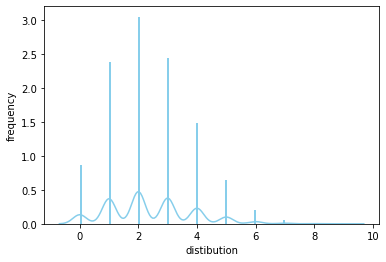

probability of getting 5 is 0.056700915640398045 
probability of getting less than or equale to 5 is 0.9739815394116625
value bellow 0.78 probablity is 3.0


In [52]:
# used for event with two outcomes  repeated n number of times

from scipy.stats import binom

binom_distribution = binom.rvs(n=20,p=0.12,size=10000)

# plot distribution 

distchart(binom_distribution)

# calculate probability for given value 

bino_pdf=binom.pmf(k=5,n=20,p=0.12) 
bino_cdf=binom.cdf(k=5,n=20,p=0.12)
bino_ppf=binom.ppf(q=0.78,n=20,p=0.12)

print('probability of getting 5 is {} \nprobability of getting less than or equale to 5 is {}\nvalue bellow 0.78 probablity is {}'.format(bino_pdf,bino_cdf,bino_ppf))

### 6. Bernoulli Distribution

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


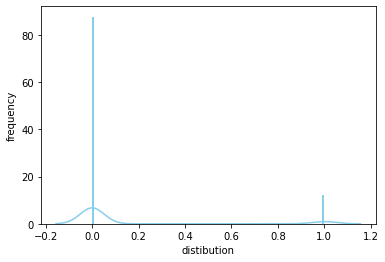

probability of getting 5 is 0.0 
probability of getting less than or equale to 5 is 1.0
value bellow 0.78 probablity is 0.0


In [54]:
# used for event with two outcomes 

from scipy.stats import bernoulli

bern_distribution = bernoulli.rvs(p=0.12,size=10000)

# plot distribution 

distchart(bern_distribution)

# calculate probability for given value 

ber_pdf=bernoulli.pmf(k=5,p=0.12) 
ber_cdf=bernoulli.cdf(k=5,p=0.12)
ber_ppf=bernoulli.ppf(q=0.78,p=0.12)

print('probability of getting 5 is {} \nprobability of getting less than or equale to 5 is {}\nvalue bellow 0.78 probablity is {}'.format(ber_pdf,ber_cdf,ber_ppf))

## Sampling 

In [38]:
# two types of sampling can be selected 1. probabilitic and 2. non-probabilitic

# probabilitic sampling - random sample, sequential, stratified, clustor 

# random sample 

url='https://docs.google.com/spreadsheets/d/1LSHC1VWppDRMtvoPz_DmbXOi_j8RUJ_Mt5aVjwkA79M/export?format=csv'

data=pd.read_csv(url)
sample_data=data.sample(10,random_state=1)
sample_data.shape

(10, 3)

In [29]:
sample_data.head()

,sample,x bar,range
17,18,28.4,3
21,22,26.0,5
10,11,23.9,3
19,20,26.2,6
14,15,26.4,2


In [30]:
# sequential sample 

sequential_sample=data.iloc[lambda x: x.index % 3 ==0]
sequential_sample.shape

(10, 3)

In [31]:
sequential_sample.head()

,sample,x bar,range
0,1,29.0,11
3,4,25.2,5
6,7,26.0,5
9,10,21.4,4
12,13,27.0,4


In [39]:
# stratisfied sample 

from sklearn.model_selection import train_test_split
sample_train, sample_test=train_test_split(data,test_size=0.3,random_state=1)

In [40]:
sample_train.shape,sample_test.shape

((21, 3), (9, 3))